# Multiple Linear Regression to NHL players dataset

In this notebook I intend to show simple way to do Multiple Linear Regression in Python. I use the NHL dataset, especially because Stanley Cup finals are about to start (Go Vegas!). My goal is here to determine the cap hit of the player (Cap Hit = salary of the player in this particular year) depending on other variables, such as goals, assists, heigth, etc.

Let us begin by importing Python packages/libraries:

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import seaborn as sns

%matplotlib inline

Next phase: read in our messy excel including statistics for NHL players. Let's print some info to demonstrate how unnecessarily messy this csv-file is:

In [5]:
nhl = pd.read_csv('nhl_dataframe.csv')
nhl.head()

,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,Ovrl,...,1st,2nd,3rd,MGL,Injuries,CHIP,NMC,Status,Salary,Cap Hit
0,1988-04-30,Hamilton,ON,CAN,CAN,69,170,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UFA,"$575,000.00",575000.0
1,1987-02-25,Muskegon,MI,USA,USA,74,218,2005.0,2.0,42.0,...,0.0,0.0,1.0,18.0,"Lower body, Knee","$932,926.83",NTC,UFA,"$5,500,000.00",4250000.0
2,1993-09-23,Stockholm,NaN,SWE,SWE,71,196,2012.0,2.0,37.0,...,0.0,0.0,1.0,NaN,NaN,NaN,NaN,RFA,"$842,500.00",780833.0
3,1991-12-01,Johnston,RI,USA,USA,70,208,NaN,NaN,NaN,...,0.0,0.0,1.0,15.0,"Lower body, Upper body","$144,969.51",NaN,RFA,"$892,500.00",792500.0
4,1992-04-30,Morristown,NJ,USA,USA,72,202,2010.0,5.0,140.0,...,0.0,1.0,0.0,NaN,NaN,NaN,NaN,UFA,"$625,000.00",625000.0


In [6]:
nhl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Columns: 167 entries, Born to Cap Hit
dtypes: float64(63), int64(68), object(36)
memory usage: 1.1+ MB


Take a look at those five first rows and info from dataset. I looks like that we have many unnecessary columns here in order to determine cap hit of the player on the team. Let's use the most relevant columns according to my substance knowledge: Goals (G), assists (A), Time on ice per game (TOI/GP) and finally we are going to need our dependent variable we want to predict: Cap Hit (Cap Hit). I'm also interested in if height (Ht) and weight (Wt) affect the cap hit of the player.

In [10]:
nhl = nhl[['Ht', 'Wt', 'G', 'A','TOI/GP','Cap_Hit']]
nhl.columns = nhl.columns.str.replace('\s+', '_') # I hate white spaces in variable/column names, so here I replace white space with _ (underscore?)
nhl.head()

,Ht,Wt,G,A,TOI/GP,Cap_Hit
0,69,170,0,0,8.57,575000.0
1,74,218,7,14,16.65,4250000.0
2,71,196,1,1,12.33,780833.0
3,70,208,2,3,10.23,792500.0
4,72,202,1,2,12.78,625000.0


Now important step: look for missing values in your filtered dataset:

In [12]:
nhl.isnull().sum().sum()

14

In [13]:
nhl.isnull().any()

Ht         False
Wt         False
G          False
A          False
TOI/GP     False
Cap_Hit     True
dtype: bool

nhl.isnull().sum().sum() shows us how many missing values there are in dataset. I use this first to see total number of missing values in my datasets. If I want to find where those missing values are located, then I use this: 
nhl.isnull().any()
And that is a great way to quickly see in which columns those pesky missing values are located. In this dataset they were located in Cap_Hit column.

Now we need to figure how to proceed with those missing values. In this case I'm going  to replace missing values with mean from Cap_Hit column:

In [14]:
nhl.Cap_Hit.mean()

2256500.3135011443

In [15]:
nhl['Cap_Hit'].fillna(2256500, inplace = True)

In [16]:
nhl.isnull().sum().sum()

0

After another check there seems to be no missing values and we may proceed to the next step. Let's pickup wanted values:

In [17]:
nhl = nhl.iloc[0:875,:]
nhl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875 entries, 0 to 874
Data columns (total 6 columns):
Ht         875 non-null int64
Wt         875 non-null int64
G          875 non-null int64
A          875 non-null int64
TOI/GP     875 non-null float64
Cap_Hit    875 non-null float64
dtypes: float64(2), int64(4)
memory usage: 41.1 KB


Looking good! No missing values and all columns seem to be in correct datatype (int of float). Now we define our independent variables (based on which we want to predict the Cap Hit) and dependent variable Cap Hit):

In [19]:
feature_cols = ['Ht', 'Wt', 'G', 'A','TOI/GP']
X = nhl[feature_cols]
y = nhl.Cap_Hit

And now for the modeling: Fitting the multiple linear model is quite easy as you can see:

In [21]:
model = smf.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Cap_Hit   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     586.0
Date:                Sun, 27 May 2018   Prob (F-statistic):          1.41e-275
Time:                        13:06:28   Log-Likelihood:                -13662.
No. Observations:                 875   AIC:                         2.733e+04
Df Residuals:                     870   BIC:                         2.736e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Ht         -8.277e+04   1.19e+04     -6.945      0.000   -1.06e+05   -5.94e+04
Wt          2.431e+04   4267.116      5.697      0.000    1.59e+04    3.27e+04
G            3.24e+04   8977.945      3.609      0.000    1.48e+04       5e+04
A           4.813e+04   7486.153      6.429      0.000    3.34e+04    6.28e+04
TOI/GP      1.717e+05   1.61e+04     10.632      0.000     1.4e+05    2.03e+05
==============================================================================
Omnibus:                       42.327   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.936
Skew:                           0.347   Prob(JB):                     3.24e-17
Kurtosis:                       4.265   Cond. No.                         75.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The summary shows us that all our independent variables are significant (p-values < 0.005). Linear regression is very popular model because it is easy and quick to interpret. For example based on that summary we can deduct that when number of goals increases by one unit -> salary/cap hit goes up by 32400 $ (3.24e+04). Suprisingly also height (Ht) and weight (Wt) values are significant when determining cap hit of the player. 

Also the Adj.R-Squared value is important here. It basically tell us that 77 percent of the cap hit can be explained by our independent variables that I chose based on my substance knowledge. Pretty good for a simple model, right?

Now let's do some plotting to see how cap hit acts upon variables:

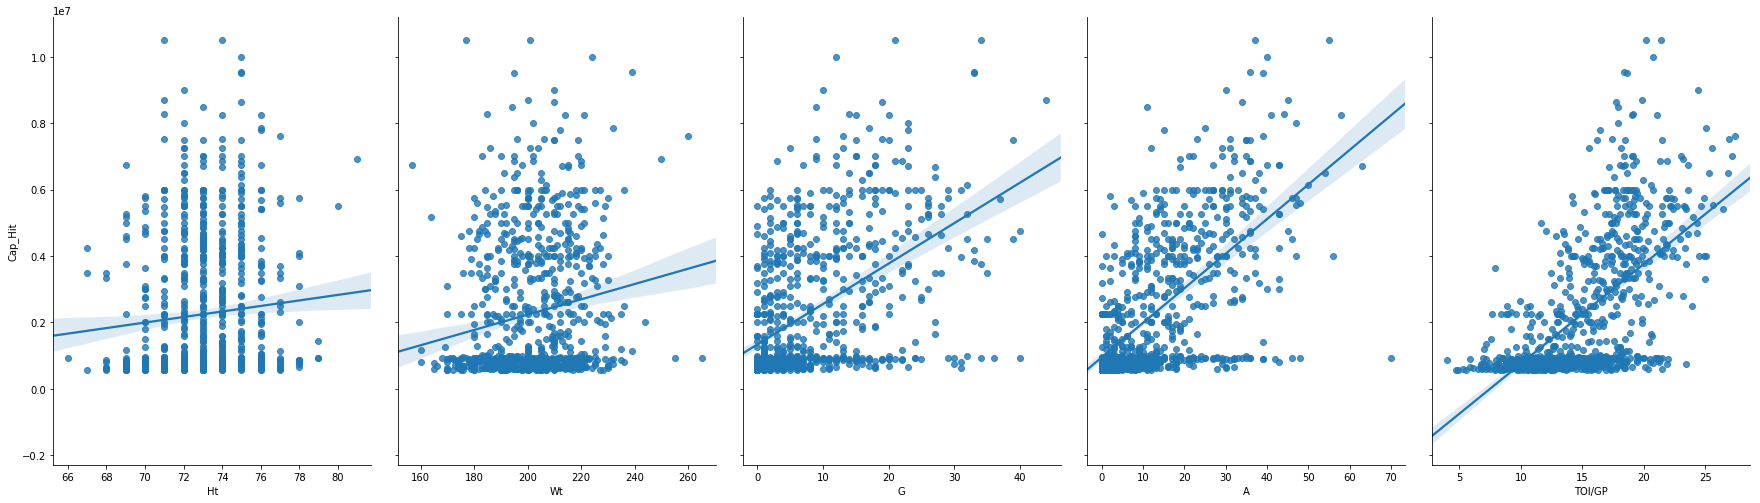

In [22]:
sns.pairplot(nhl, x_vars=['Ht','Wt', 'G', 'A','TOI/GP'], y_vars='Cap_Hit', size=7, aspect=0.7, kind='reg')

And that's all for now! This was a short introduction to Linear Regression and there are always things I could optimize here. But this is just a demonstration that these simple model can do well compared to more complicated models.

## Thanks for reading and happy coding!